In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('ai_job_dataset.csv')

In [18]:
plt.style.use('default')
sns.set_palette("husl")

In [19]:
columns_to_drop = ['job_id', 'posting_date', 'application_deadline', 'job_description_length']
df_cleaned = df.drop(columns=columns_to_drop)

In [20]:
missing_values = df_cleaned.isnull().sum()
if missing_values.any():
    print("Missing values found in the dataset:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


In [21]:
df_cleaned.describe()

,salary_usd,remote_ratio,years_experience,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,7.504273
std,60260.940438,40.812712,5.545768,1.450870
min,32519.000000,0.000000,0.000000,5.000000
25%,70179.750000,0.000000,2.000000,6.200000
50%,99705.000000,50.000000,5.000000,7.500000
75%,146408.500000,100.000000,10.000000,8.800000
max,399095.000000,100.000000,19.000000,10.000000


job_title: 20 unique values
  Values: ['AI Architect', 'AI Consultant', 'AI Product Manager', 'AI Research Scientist', 'AI Software Engineer', 'AI Specialist', 'Autonomous Systems Engineer', 'Computer Vision Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Deep Learning Engineer', 'Head of AI', 'ML Ops Engineer', 'Machine Learning Engineer', 'Machine Learning Researcher', 'NLP Engineer', 'Principal Data Scientist', 'Research Scientist', 'Robotics Engineer']
salary_currency: 3 unique values
  Values: ['EUR', 'GBP', 'USD']
experience_level: 4 unique values
  Values: ['EN', 'EX', 'MI', 'SE']
employment_type: 4 unique values
  Values: ['CT', 'FL', 'FT', 'PT']
company_location: 20 unique values
  Values: ['Australia', 'Austria', 'Canada', 'China', 'Denmark', 'Finland', 'France', 'Germany', 'India', 'Ireland', 'Israel', 'Japan', 'Netherlands', 'Norway', 'Singapore', 'South Korea', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']
company_size: 3 unique values
  Values

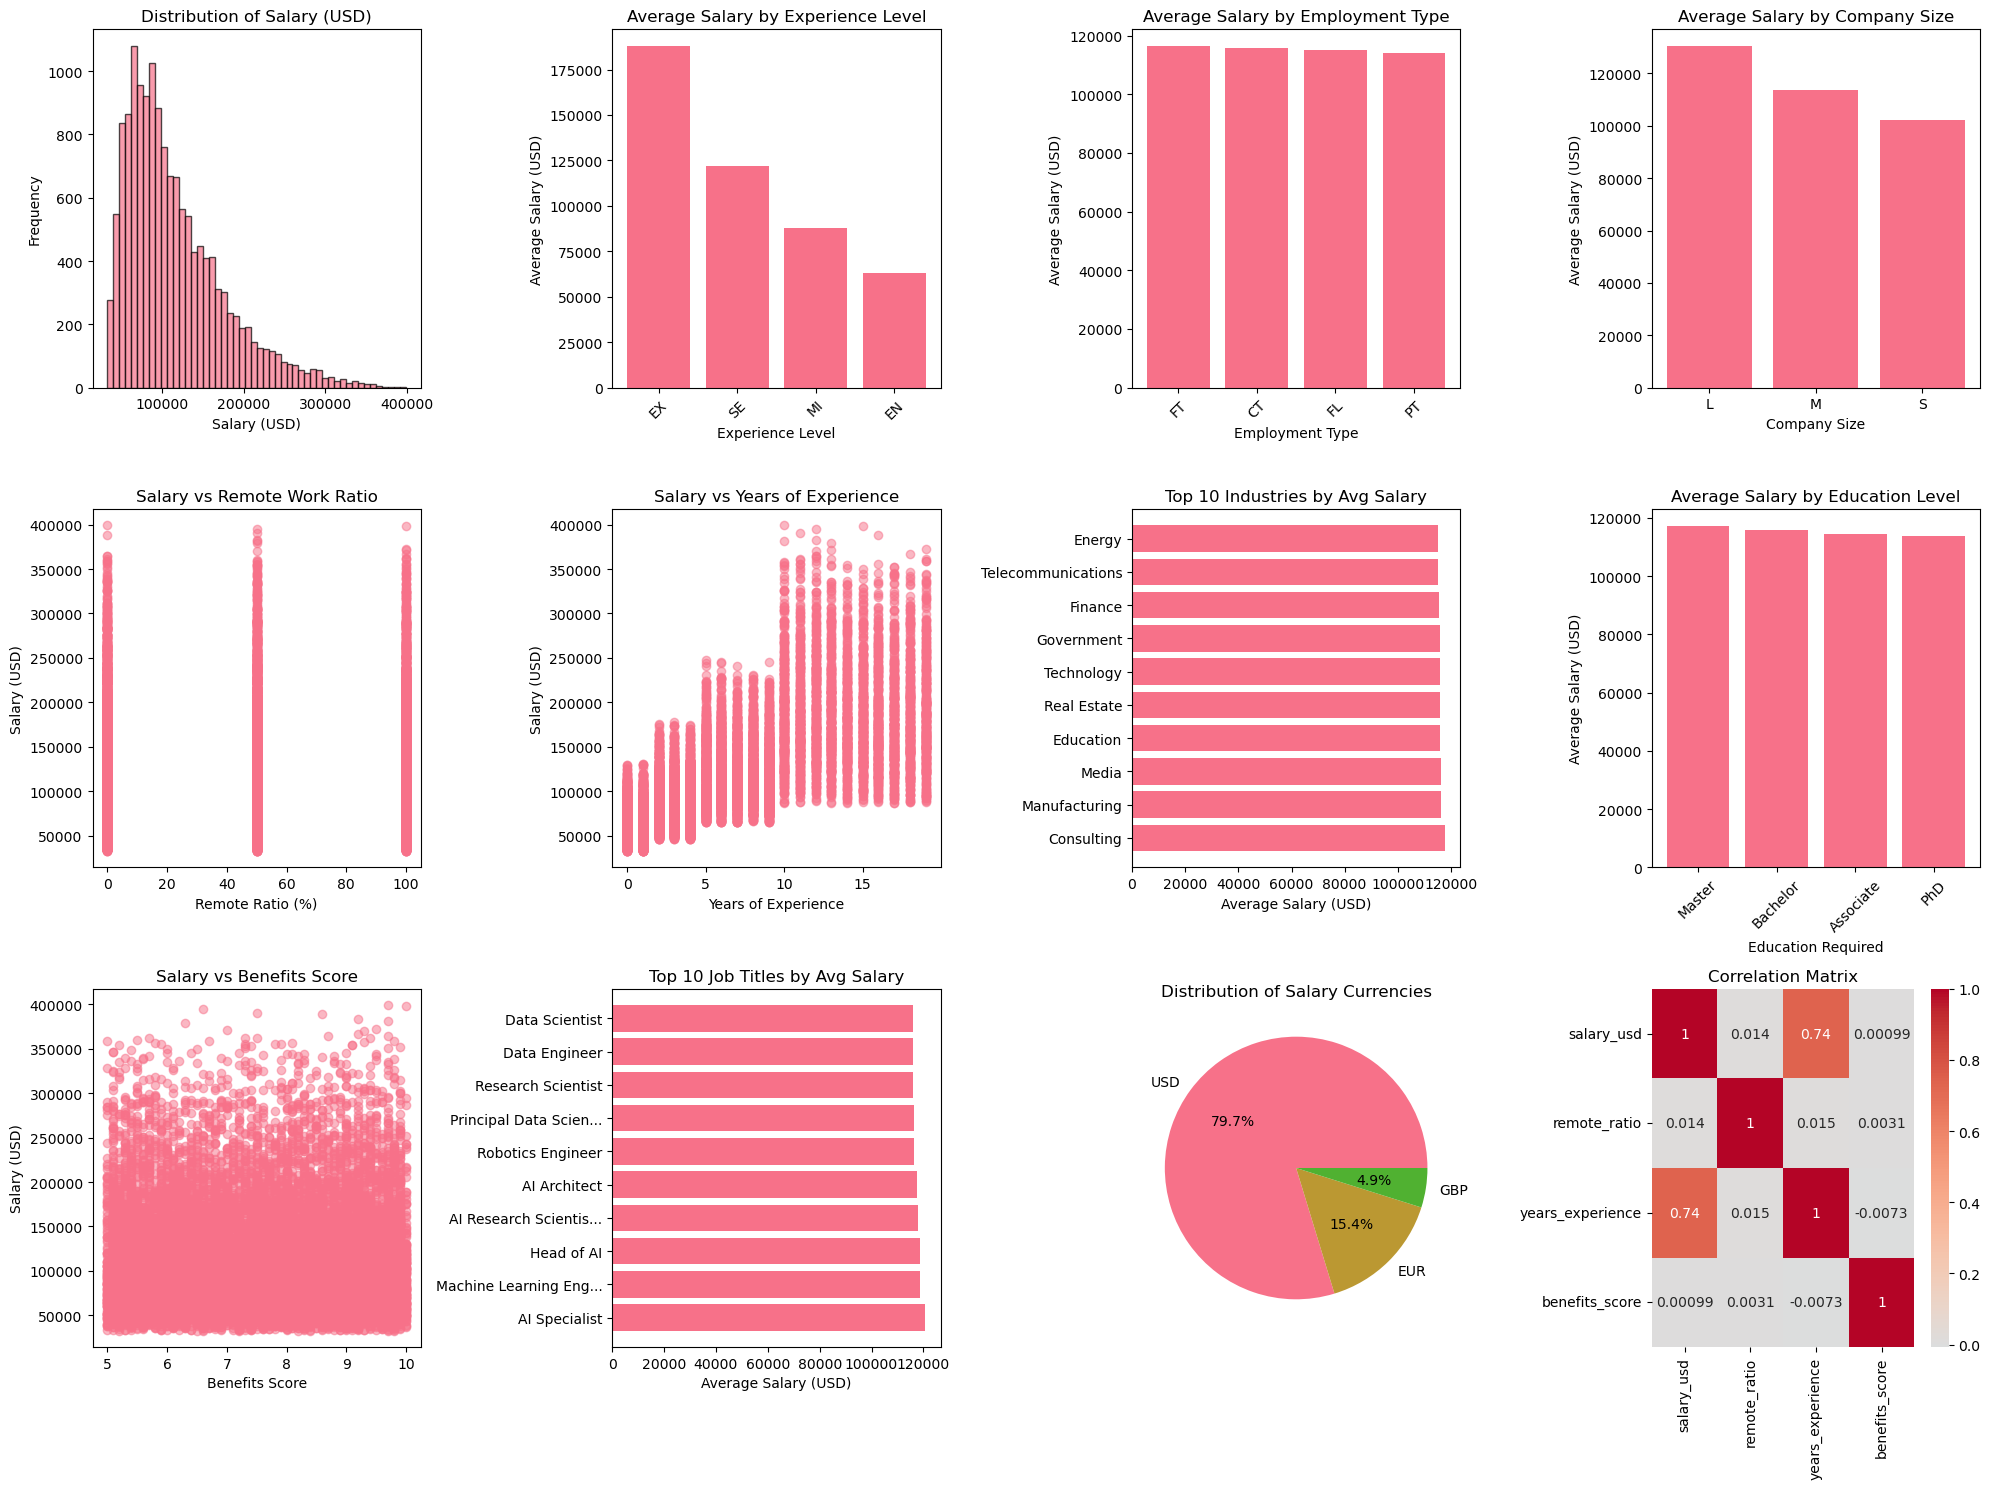


DATA PREPROCESSING
Applying one-hot encoding to categorical variables...
required_skills has 13663 unique values - will use special encoding

Processing required_skills column...
Top 20 skills: ['Python', 'SQL', 'TensorFlow', 'Kubernetes', 'Scala', 'PyTorch', 'Linux', 'Git', 'Java', 'GCP', 'Hadoop', 'Tableau', 'R', 'Computer Vision', 'Data Visualization', 'Deep Learning', 'MLOps', 'Spark', 'NLP', 'Azure']
Shape after encoding: (15000, 99)
Number of features: 98
Features shape: (15000, 98)
Target shape: (15000,)
Training set shape: (12000, 98)
Test set shape: (3000, 98)

MODEL BUILDING AND EVALUATION
Training and evaluating models...

--- Linear Regression ---
MSE: 539840457.25
RMSE: 23234.47
MAE: 17044.97
R² Score: 0.8520

--- Decision Tree ---
Performing hyperparameter tuning...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
MSE: 573129794.07
RMSE: 23940.13
MAE: 16941.56
R² Score: 0.8429

--- Random Forest ---
Performing hyperparameter tuning...
Be

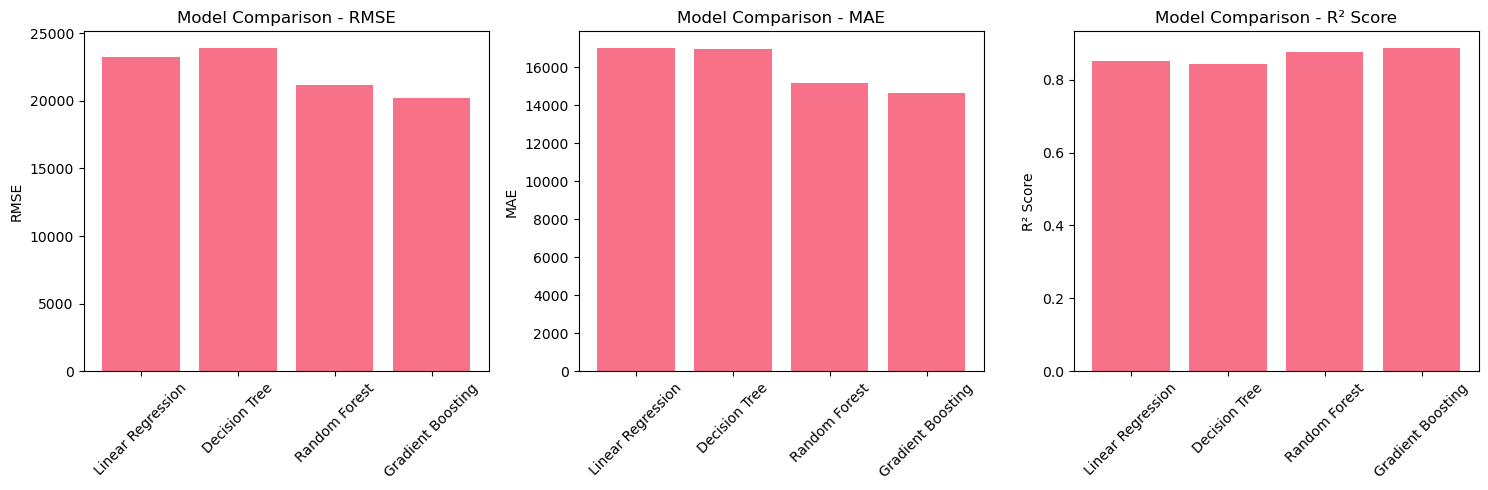

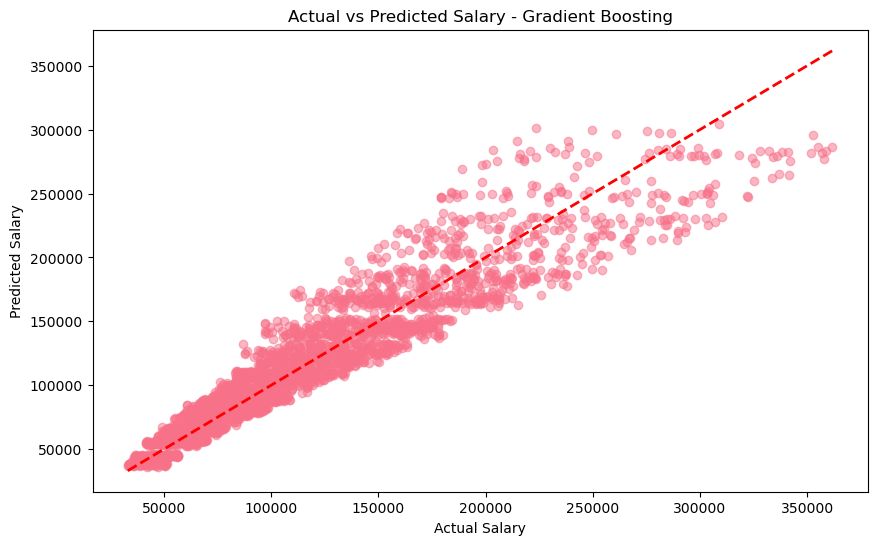


Top 15 Feature Importances for Gradient Boosting:
                           feature  importance
1                 years_experience    0.329535
29             experience_level_EX    0.286126
53    company_location_Switzerland    0.063602
31             experience_level_SE    0.049217
40        company_location_Denmark    0.041936
56                  company_size_L    0.035211
49         company_location_Norway    0.032847
55  company_location_United States    0.018911
28             experience_level_EN    0.017575
58                  company_size_S    0.017565
37        company_location_Austria    0.012334
47          company_location_Japan    0.010536
46         company_location_Israel    0.010265
41        company_location_Finland    0.010108
51    company_location_South Korea    0.010090


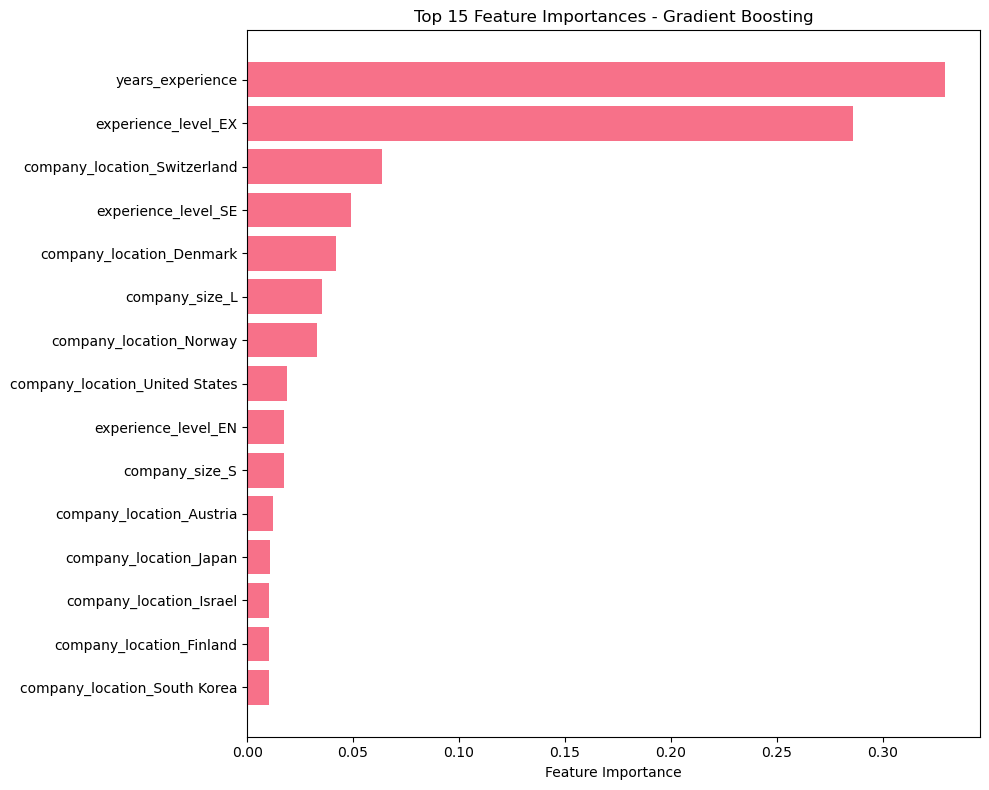


SAVING MODELS AND PREPROCESSORS
Saving best model (Gradient Boosting) and preprocessors...
Files saved:
- best_salary_model.pkl (trained model)
- salary_scaler.pkl (feature scaler)
- model_info.pkl (model information and feature names)

Project completed successfully!
Best model: Gradient Boosting with R² score of 0.8877

Ready for Streamlit deployment!


In [22]:

for col in categorical_columns:
    unique_count = df_cleaned[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 20:  
        print(f"  Values: {sorted(df_cleaned[col].unique())}")
    else:
        print(f"  Sample values: {sorted(df_cleaned[col].unique())[:10]}...")

fig = plt.figure(figsize=(20, 15))

plt.subplot(3, 4, 1)
plt.hist(df_cleaned['salary_usd'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(3, 4, 2)
exp_salary = df_cleaned.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)
plt.bar(exp_salary.index, exp_salary.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)

plt.subplot(3, 4, 3)
emp_salary = df_cleaned.groupby('employment_type')['salary_usd'].mean().sort_values(ascending=False)
plt.bar(emp_salary.index, emp_salary.values)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)

plt.subplot(3, 4, 4)
size_salary = df_cleaned.groupby('company_size')['salary_usd'].mean().sort_values(ascending=False)
plt.bar(size_salary.index, size_salary.values)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')

plt.subplot(3, 4, 5)
plt.scatter(df_cleaned['remote_ratio'], df_cleaned['salary_usd'], alpha=0.5)
plt.title('Salary vs Remote Work Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (USD)')

plt.subplot(3, 4, 6)
plt.scatter(df_cleaned['years_experience'], df_cleaned['salary_usd'], alpha=0.5)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')

plt.subplot(3, 4, 7)
top_industries = df_cleaned.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).head(10)
plt.barh(range(len(top_industries)), top_industries.values)
plt.yticks(range(len(top_industries)), top_industries.index)
plt.title('Top 10 Industries by Avg Salary')
plt.xlabel('Average Salary (USD)')

plt.subplot(3, 4, 8)
edu_salary = df_cleaned.groupby('education_required')['salary_usd'].mean().sort_values(ascending=False)
plt.bar(edu_salary.index, edu_salary.values)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Required')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)

plt.subplot(3, 4, 9)
plt.scatter(df_cleaned['benefits_score'], df_cleaned['salary_usd'], alpha=0.5)
plt.title('Salary vs Benefits Score')
plt.xlabel('Benefits Score')
plt.ylabel('Salary (USD)')

plt.subplot(3, 4, 10)
top_jobs = df_cleaned.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)
plt.barh(range(len(top_jobs)), top_jobs.values)
plt.yticks(range(len(top_jobs)), [title[:20] + '...' if len(title) > 20 else title for title in top_jobs.index])
plt.title('Top 10 Job Titles by Avg Salary')
plt.xlabel('Average Salary (USD)')

plt.subplot(3, 4, 11)
curr_counts = df_cleaned['salary_currency'].value_counts()
plt.pie(curr_counts.values, labels=curr_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Salary Currencies')

plt.subplot(3, 4, 12)
numerical_cols = ['salary_usd', 'remote_ratio', 'years_experience', 'benefits_score']
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

df_processed = df_cleaned.copy()

print("Applying one-hot encoding to categorical variables...")

categorical_cols = ['job_title', 'salary_currency', 'experience_level', 'employment_type', 
                   'company_location', 'company_size', 'employee_residence', 'required_skills',
                   'education_required', 'industry', 'company_name']

high_cardinality_cols = []
for col in categorical_cols:
    unique_count = df_processed[col].nunique()
    if unique_count > 50:  
        high_cardinality_cols.append(col)
        print(f"{col} has {unique_count} unique values - will use special encoding")

print("\nProcessing required_skills column...")
all_skills = []
for skills_str in df_processed['required_skills']:
    skills = [skill.strip() for skill in skills_str.split(',')]
    all_skills.extend(skills)

from collections import Counter
skill_counts = Counter(all_skills)
top_skills = [skill for skill, count in skill_counts.most_common(20)]
print(f"Top 20 skills: {top_skills}")

for skill in top_skills:
    df_processed[f'skill_{skill.lower().replace(" ", "_")}'] = df_processed['required_skills'].apply(
        lambda x: 1 if skill in x else 0
    )

df_processed = df_processed.drop('required_skills', axis=1)

for col in ['company_name', 'job_title']:
    freq_encoding = df_processed[col].value_counts().to_dict()
    df_processed[f'{col}_frequency'] = df_processed[col].map(freq_encoding)
    df_processed = df_processed.drop(col, axis=1)

remaining_categorical = [col for col in categorical_cols if col not in ['required_skills', 'company_name', 'job_title']]
df_encoded = pd.get_dummies(df_processed, columns=remaining_categorical, prefix=remaining_categorical)

print(f"Shape after encoding: {df_encoded.shape}")
print(f"Number of features: {df_encoded.shape[1] - 1}")  

X = df_encoded.drop('salary_usd', axis=1)
y = df_encoded['salary_usd']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*50)
print("MODEL BUILDING AND EVALUATION")
print("="*50)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

results = {}
best_models = {}

print("Training and evaluating models...")

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    if name == 'Linear Regression':
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    if param_grids[name]:
        print("Performing hyperparameter tuning...")
        grid_search = GridSearchCV(
            model, param_grids[name], 
            cv=5, scoring='neg_mean_squared_error', 
            n_jobs=-1, verbose=0
        )
        grid_search.fit(X_train_use, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_use, y_train)

    y_pred = best_model.predict(X_test_use)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'model': best_model
    }
    
    best_models[name] = best_model
    
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = results[best_model_name]['model']

print(f"\n" + "="*50)
print("MODEL COMPARISON AND BEST MODEL SELECTION")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[model]['RMSE'] for model in results.keys()],
    'MAE': [results[model]['MAE'] for model in results.keys()],
    'R² Score': [results[model]['R2'] for model in results.keys()]
})

print("\nModel Performance Comparison:")
print(comparison_df.round(4))

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {results[best_model_name]['R2']:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(comparison_df['Model'], comparison_df['RMSE'])
axes[0].set_title('Model Comparison - RMSE')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)


axes[1].bar(comparison_df['Model'], comparison_df['MAE'])
axes[1].set_title('Model Comparison - MAE')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)


axes[2].bar(comparison_df['Model'], comparison_df['R² Score'])
axes[2].set_title('Model Comparison - R² Score')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

if best_model_name == 'Linear Regression':
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Actual vs Predicted Salary - {best_model_name}')
plt.show()


if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 15 Feature Importances for {best_model_name}:")
    print(feature_importance.head(15))
    
    
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("\n" + "="*50)
print("SAVING MODELS AND PREPROCESSORS")
print("="*50)


print(f"Saving best model ({best_model_name}) and preprocessors...")


joblib.dump(best_model, 'best_salary_model.pkl')


joblib.dump(scaler, 'salary_scaler.pkl')


model_info = {
    'model_name': best_model_name,
    'feature_names': list(X.columns),
    'performance_metrics': results[best_model_name],
    'top_skills': top_skills,
    'categorical_columns': remaining_categorical
}

import pickle
with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("Files saved:")
print("- best_salary_model.pkl (trained model)")
print("- salary_scaler.pkl (feature scaler)")
print("- model_info.pkl (model information and feature names)")

print(f"\nProject completed successfully!")
print(f"Best model: {best_model_name} with R² score of {results[best_model_name]['R2']:.4f}")
print("\nReady for Streamlit deployment!")

In [23]:
df_encoded.columns
# Make sure to run the previous cell where df_cleaned is defined before running this cell.

Index(['salary_usd', 'remote_ratio', 'years_experience', 'benefits_score',
       'skill_python', 'skill_sql', 'skill_tensorflow', 'skill_kubernetes',
       'skill_scala', 'skill_pytorch', 'skill_linux', 'skill_git',
       'skill_java', 'skill_gcp', 'skill_hadoop', 'skill_tableau', 'skill_r',
       'skill_computer_vision', 'skill_data_visualization',
       'skill_deep_learning', 'skill_mlops', 'skill_spark', 'skill_nlp',
       'skill_azure', 'company_name_frequency', 'job_title_frequency',
       'salary_currency_EUR', 'salary_currency_GBP', 'salary_currency_USD',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT',
       'company_location_Australia', 'company_location_Austria',
       'company_location_Canada', 'company_location_China',
       'company_location_Denmark', 'company_location_Finland',
       'company_location_France', '

In [24]:
df_encoded.shape

(15000, 99)